# Aesthetic Plotting with Matplotlib

The goal of this notebook is to provide simple and aesthetic examples of common types of plots. These figures are not fixed templates; you are expected to modify the code to suit your data.

> At their best, graphics are instruments for reasoning about quantitative information. Often, the most effective way to describe, explore, and summarize a set of numbers - even a very large set - is to look at pictures of those numbers.
Edward Tufte [1]

Remember, figures are meant to support your narrative, and their primary goal is to convey a clear message. Identify your audience, your message, and design the figure accordingly.

> Ultimately, it is content that makes graphics interesting. When a chart is presented properly, information just flows to the viewer in the clearest and most efficient way. There are no extra layers of colors, no enhancements to distract us from the clarity of information.
Dona M. Wong [2]

If you have suggestions or would like additional types of figures included, feel free to reach out to me (@Quentin Fournier).

References:
1.   [The Visual Display of Quantitative Information](https://www.edwardtufte.com/book/the-visual-display-of-quantitative-information/)
2.   [The Wall Street Journal Guide to Information Graphics](https://wwnorton.com/books/The-Wall-Street-Journal-Guide-to-Information-Graphics/)
3.   [Nature’s top science graphics from 2022
](https://www.nature.com/articles/d41586-022-04174-6)

In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Display figures in higher quality
# %config InlineBackend.figure_format='retina'

# Color Palette

Choosing a good color palette is essential for visual design, as it can influence perception and overall effectiveness.

Here are some resources where you can find and explore color palettes for your projects:
- [https://colorbrewer2.org/](https://colorbrewer2.org/)
- [https://coolors.co/palettes](https://coolors.co/palettes)

In [ ]:
# Color palette **inspired** by Meta's
palette = {r'BERT$_{base}$': "#b1d9ff",
           r'BERT$_{large}$': "#76bdff",
           r'RoBERTa$_{base}$': "#3ba1ff",
           r'RoBERTa$_{large}$': "#0085ff",
           "NeoBERT": "#6441d2",
           "Win": "#004bba",
           "Tie":  "#48a5fb",
           "Loss": "#cce6ff",
           }

# Bar Plot

Bar plots are a great way to compare discrete categories by using bars whose lengths represent their values. As such, *you must ensure that bars starts at 0*. Starting at any other values exaggerate or misrepresent differences between categories.

In [ ]:
# Generate random data
data = {"Model": [], "Benchmark": [], "Score": []}
for i, model in enumerate([r'BERT$_{base}$', r'BERT$_{large}$', r'RoBERTa$_{base}$', r'RoBERTa$_{large}$', "NeoBERT"], 1):
  for benchmark in ["CoLA", "SST-2", "MRPC"]:
    data["Model"].append(model)
    data["Benchmark"].append(benchmark)
    data["Score"].append(i * 10 + np.random.randint(20, 50))
df = pd.DataFrame(data)
df.head()

,Model,Benchmark,Score
0,BERT$_{base}$,CoLA,32
1,BERT$_{base}$,SST-2,33
2,BERT$_{base}$,MRPC,40
3,BERT$_{large}$,CoLA,56
4,BERT$_{large}$,SST-2,41


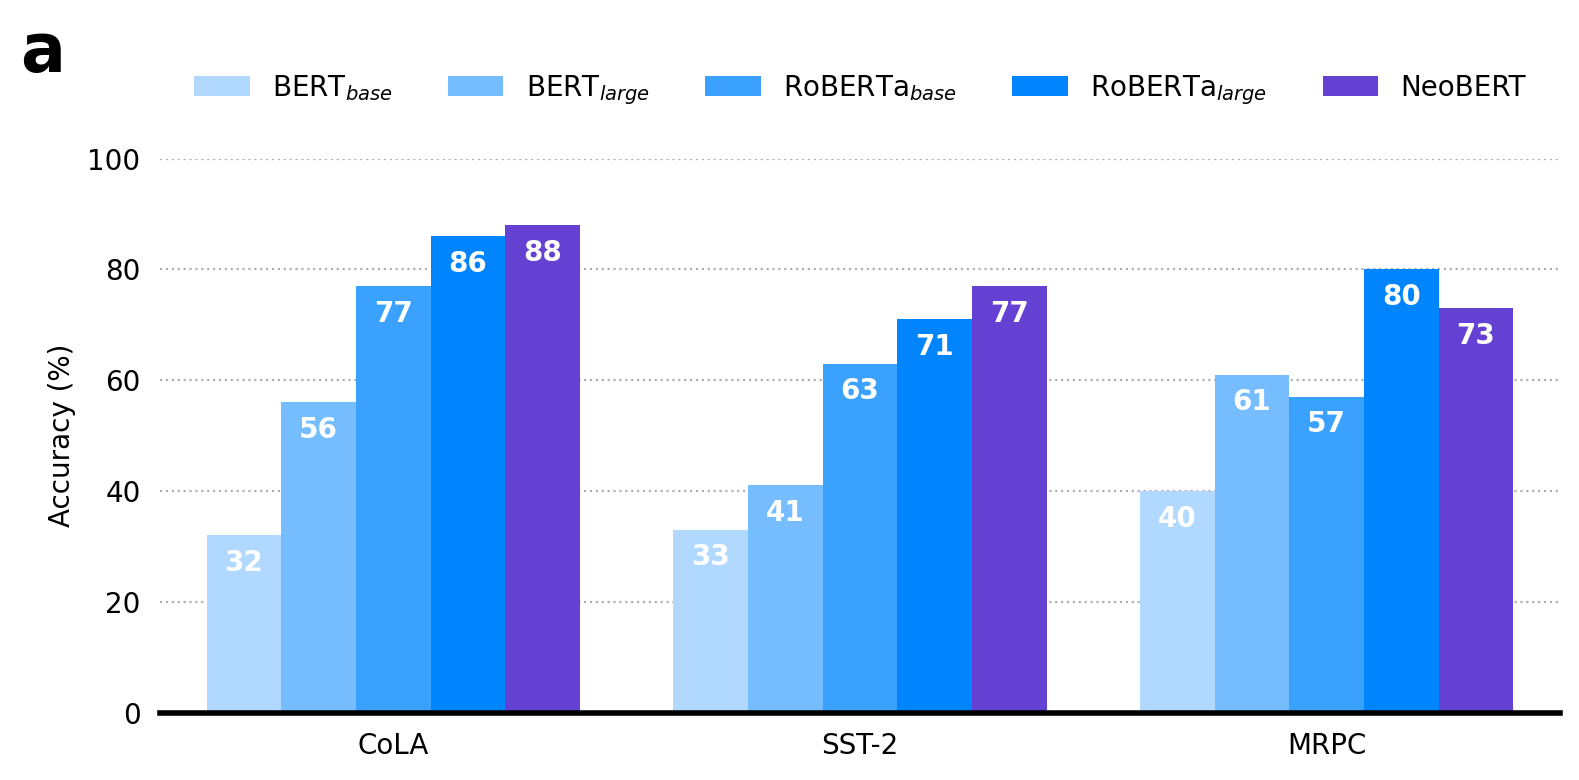

In [ ]:
# Create the figure with a tight layout
fig, ax = plt.subplots(1, 1, figsize=(8, 4), tight_layout=True)

# Plot histogram
sns.barplot(df,
            x="Benchmark",
            y="Score",
            hue="Model",
            palette=palette,
            saturation=1.0,
            ax=ax,
            )

# Values in the bars
y_offset = -5
for rect in ax.patches:
  if rect.get_height() > 10.0:
    ax.text(
        rect.get_x() + rect.get_width() /  2.0,
        rect.get_height() + y_offset,
        f"{rect.get_height():.0f}",
        fontsize=10,
        ha="center",
        va="center",
        color="white",
        weight='bold',
    )

# Style adjustments for the plot
ax.set_xlabel("")  # Remove x-axis label
ax.set_ylabel("Accuracy (%)")  # Label y-axis
ax.set_ylim(0, 100)  # Set limits for y-axis

# Customize ticks and labels
ax.set_yticks([0, 20, 40, 60, 80, 100])
ax.tick_params(left=False, bottom=False)

# Customize borders
ax.spines["top"].set_visible(False)  # Hide the top border
ax.spines["right"].set_visible(False)  # Hide the right border
ax.spines["left"].set_visible(False)  # Hide the left border
ax.spines["bottom"].set_linewidth(2)  # Thicken the bottom border

# Add horizontal grid behind the lines
ax.yaxis.grid(True, which="major", linestyle=":")
ax.set_axisbelow(True)

# Legend
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=5, frameon=False)

# Add a subplot etiquette
ax.text(-0.1, 1.25, "a", fontsize=24, fontweight="bold", ha="left", va="top", transform=ax.transAxes)

# Save the figure as PNG (raster) and PDF (vector)
plt.savefig("bar.png", bbox_inches="tight", dpi=300, transparent=True)
plt.savefig("bar.pdf", bbox_inches="tight", transparent=True)


# Histograms

Histograms are a great way to visualize the distribution of continuous data by dividing the range of values into intervals, or bins, and showing the frequency of data points within each bin. As for the bar plots, *you must ensure that bars starts at 0* to avoid distorting the representation of frequencies.

In [ ]:
df = pd.DataFrame({
    "Model": [r'RoBERTa$_{large}$'] * 100_000 + ["NeoBERT"] * 500_000,
    "Score": np.concatenate((np.random.normal(loc=7, scale=2.0, size=100_000),
                             np.random.normal(loc=9, scale=1.5, size=500_000)))
        })
df.head()

,Model,Score
0,RoBERTa$_{large}$,6.592786
1,RoBERTa$_{large}$,7.248690
2,RoBERTa$_{large}$,7.544792
3,RoBERTa$_{large}$,6.874737
4,RoBERTa$_{large}$,5.032277


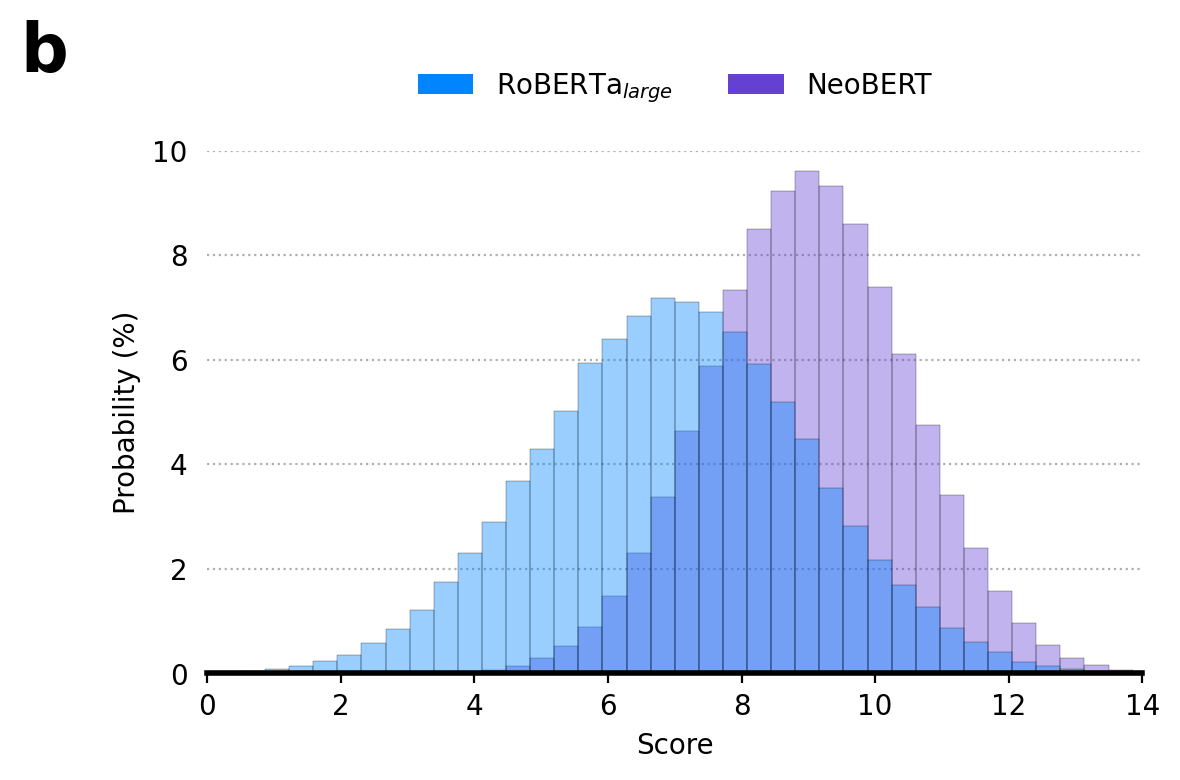

In [ ]:
# Create the figure with a tight layout
fig, ax = plt.subplots(1, 1, figsize=(6, 4), tight_layout=True)

# Plot histogram
sns.histplot(df,
            x="Score",
            hue="Model",
            stat="percent",
            alpha=0.4,
            lw=0.1,
            bins=50,
            common_bins=True,
            common_norm=False,
            palette=palette,
            ax=ax,
            )

# Style adjustments for the plot
ax.set_xlabel("Score")  # Remove x-axis label
ax.set_ylabel("Probability (%)")  # Label y-axis
ax.set_ylim(0, 10)  # Set limits for y-axis
ax.set_xlim(0, 14)  # Set limits for y-axis

# Customize x-axis ticks and labels
ax.set_yticks([0, 2, 4, 6, 8, 10])
ax.tick_params(left=False)

# Customize borders
ax.spines["top"].set_visible(False)  # Hide the top border
ax.spines["right"].set_visible(False)  # Hide the right border
ax.spines["left"].set_visible(False)  # Hide the left border
ax.spines["bottom"].set_linewidth(2)  # Thicken the bottom border

# Add horizontal grid behind the lines
ax.yaxis.grid(True, which="major", linestyle=":")
ax.set_axisbelow(True)

# Legend
legend_elements = [Patch(facecolor=palette[r'RoBERTa$_{large}$'], label=r'RoBERTa$_{large}$'),
                   Patch(facecolor=palette["NeoBERT"], label="NeoBERT")]
ax.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=2, frameon=False)

# Add a subplot etiquette
ax.text(-0.2, 1.25, "b", fontsize=24, fontweight="bold", ha="left", va="top", transform=ax.transAxes)

# Save the figure as PNG (raster) and PDF (vector)
plt.savefig("hist.png", bbox_inches="tight", dpi=300)
plt.savefig("hist.pdf", bbox_inches="tight")


# Lineplot

In [ ]:
# Generate random data
data = {"Model": [], "Step": [], "Loss": []}
for i, model in enumerate([r'BERT$_{base}$', r'BERT$_{large}$', r'RoBERTa$_{base}$', r'RoBERTa$_{large}$', "NeoBERT"], 1):
  for step in range(101):
      data["Model"].append(model)
      data["Step"].append(step)
      data["Loss"].append(0.08 * step**(1 + i/10) + np.random.randint(1, 100) / 50)
df = pd.DataFrame(data)
df.head()

,Model,Step,Loss
0,BERT$_{base}$,0,1.420000
1,BERT$_{base}$,1,1.920000
2,BERT$_{base}$,2,1.351484
3,BERT$_{base}$,3,1.287870
4,BERT$_{base}$,4,1.087583


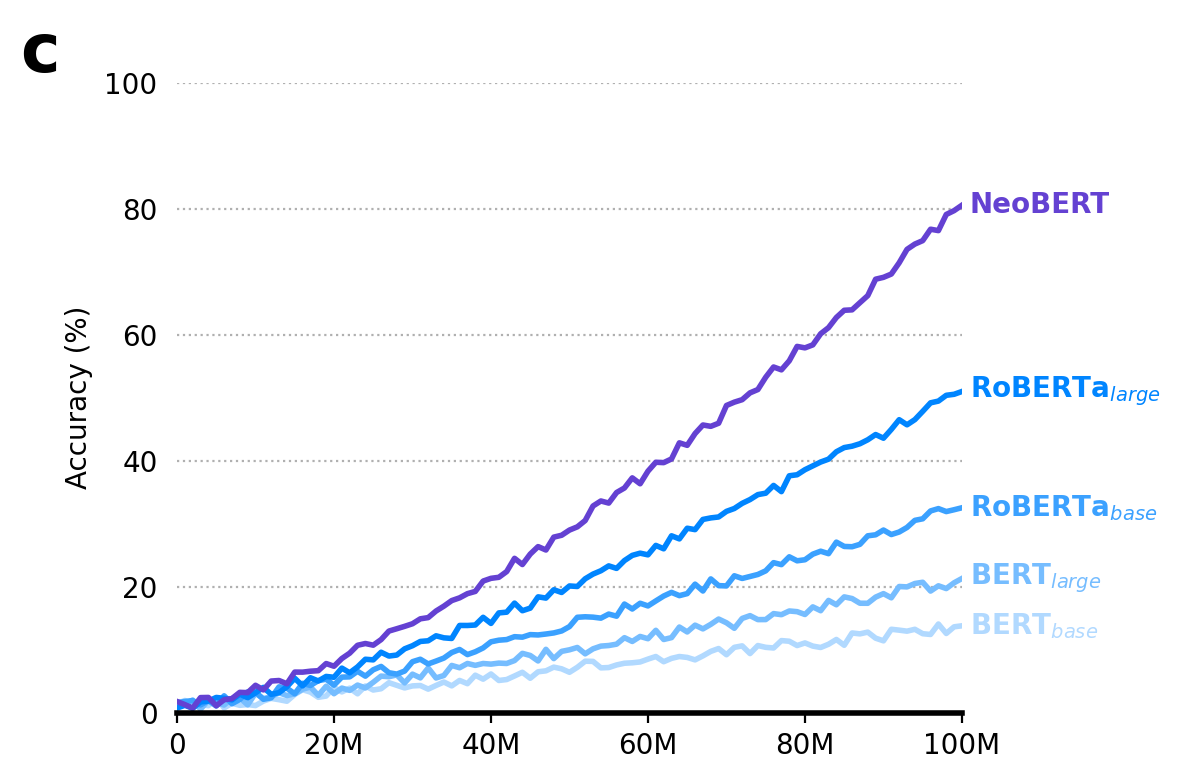

In [ ]:
# Create the figure with a tight layout
fig, ax = plt.subplots(1, 1, figsize=(6, 4), tight_layout=True)

# Plot the line graph
sns.lineplot(df, x="Step", y="Loss", hue="Model", palette=palette, linewidth=2, legend=None)

# Add labels for each model name next to its line in the plot
for model in set(df["Model"]):
    x = 100  # Step to place label
    y = float(df[(df["Model"] == model) & (df["Step"] == x)]["Loss"].iloc[0])  # Retrieve 'Loss' at step x
    ax.text(x + 1, y, model, color=palette[model], fontsize=10, weight="bold", va="center")

# Style adjustments for the plot
ax.set_xlabel("")  # Remove x-axis label
ax.set_ylabel("Accuracy (%)")  # Label y-axis with 'Accuracy (%)'
ax.set_xlim(0, 100)  # Set limits for x-axis from 0 to 100
ax.set_ylim(0, 100)  # Set limits for y-axis from 0 to 100

# Customize x-axis ticks and labels
ax.tick_params(left=False)
ax.set_xticks([0, 20, 40, 60, 80, 100], ["0", "20M", "40M", "60M", "80M", "100M"])

# Customize borders
ax.spines["top"].set_visible(False)  # Hide the top border
ax.spines["right"].set_visible(False)  # Hide the right border
ax.spines["left"].set_visible(False)  # Hide the left border
ax.spines["bottom"].set_linewidth(2)  # Thicken the bottom border

# Add horizontal grid behind the lines
ax.yaxis.grid(True, which="major", linestyle=":")
ax.set_axisbelow(True)

# Add a subplot etiquette
ax.text(-0.2, 1.1, "c", fontsize=24, fontweight="bold", ha="left", va="top", transform=ax.transAxes)

# Save the figure as PNG (raster) and PDF (vector)
plt.savefig("line.png", bbox_inches="tight", dpi=300)
plt.savefig("line.pdf", bbox_inches="tight")

# Stack Bar Plot

In [ ]:
# Data categories
categories = [
    'Advice', 'Chit-Chat', 'Games: Choose-your-own-adventure', 'Games: Social & party',
    'Games: Word & language', 'Identity / Personas', 'Cultural & social topics',
    'Geographical information', 'Historical events & figures',
    'Scientific concepts and explanations', 'Technical information'
]

# Percentage data for Win, Tie, and Loss
win_data = np.asarray([25, 20, 27, 29, 24, 27, 18, 26, 25, 18, 33])
tie_data = np.asarray([55, 48, 50, 53, 49, 48, 55, 44, 59, 55, 56])
loss_data = np.asarray([20, 32, 23, 18, 27, 25, 27, 30, 16, 27, 11])


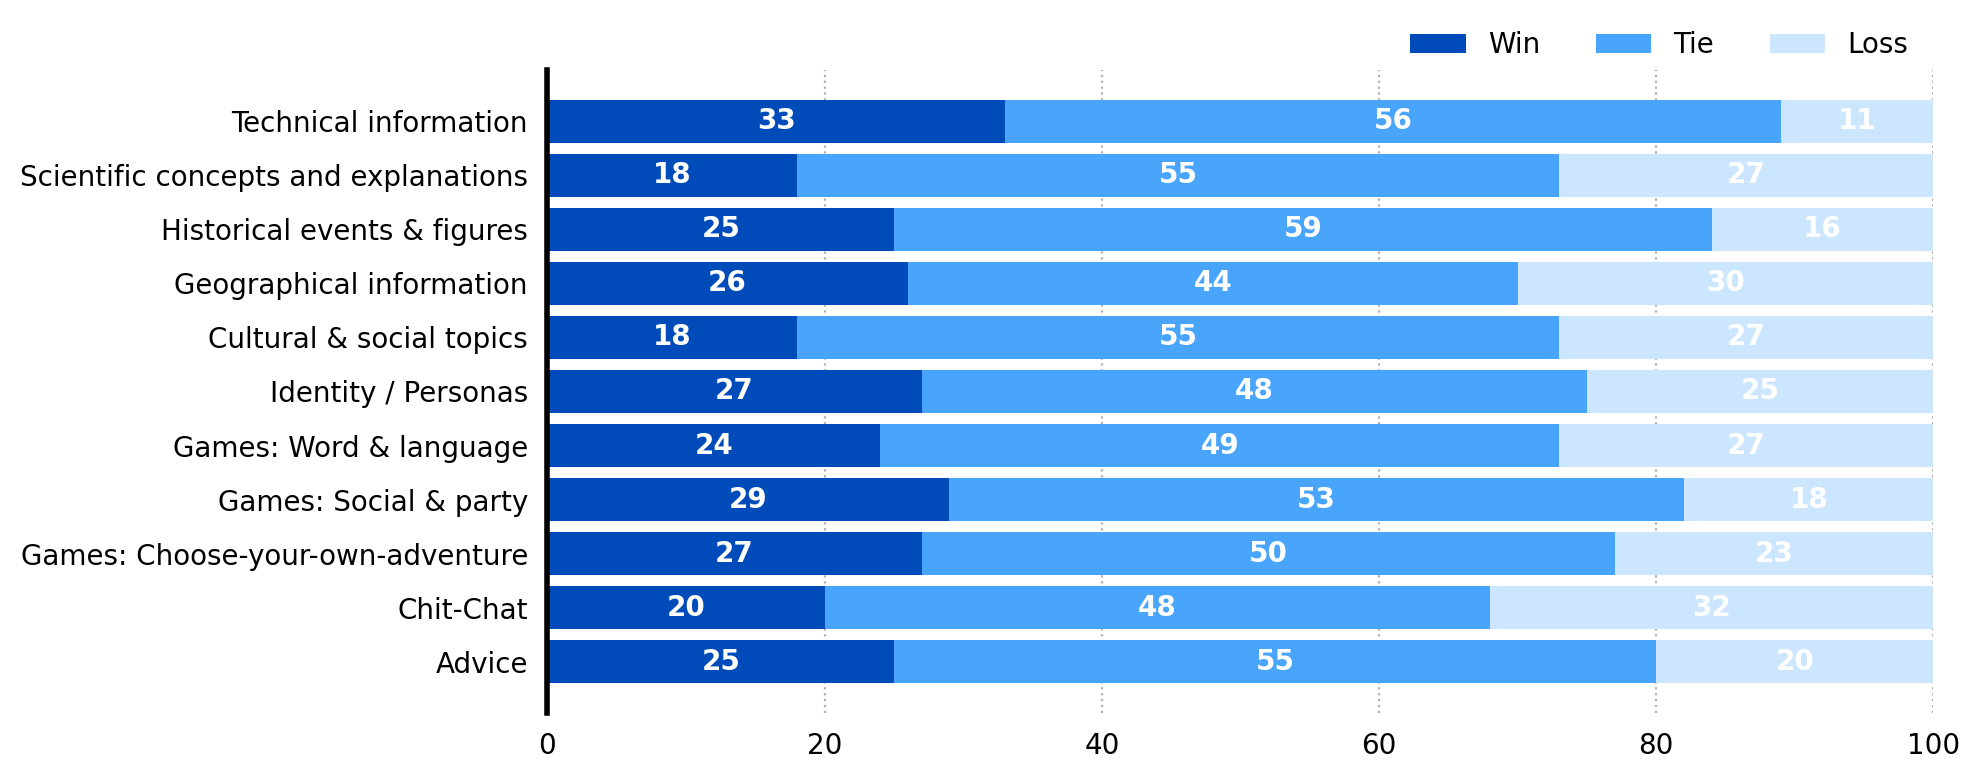

In [ ]:
# Create the figure with a tight layout
fig, ax = plt.subplots(1, 1, figsize=(10, 4), tight_layout=True)

# Stack bars for each category
ax.barh(categories, win_data, color=palette["Win"], label='Win')
ax.barh(categories, tie_data, left=win_data, color=palette["Tie"], label='Tie')
ax.barh(categories, loss_data, left=win_data + tie_data, color=palette["Loss"], label='Loss')

# Values in the bars
x_offset = -3
for rect in ax.patches:
  if rect.get_width() > 5.0:
    ax.text(
        rect.get_x() + rect.get_width() / 2.0,
        rect.get_y() + rect.get_height() /  2.0,
        f"{rect.get_width():.0f}",
        fontsize=10,
        ha="center",
        va="center",
        color="white",
        weight='bold',
    )

# Style adjustments for the plot
ax.set_xlabel("")  # Label x-axis
ax.set_ylabel("")  # Label y-axis
ax.set_xlim(0, 100)  # Set limits for x-axis

# Customize x-axis ticks and labels
ax.tick_params(left=False, bottom=False)

# Customize borders
ax.spines["top"].set_visible(False)  # Hide the top border
ax.spines["right"].set_visible(False)  # Hide the right border
ax.spines["bottom"].set_visible(False)  # Hide the bottom border
ax.spines["left"].set_linewidth(2)  # Thicken the left border

# Add horizontal grid behind the lines
ax.xaxis.grid(True, which="major", linestyle=":")
ax.set_axisbelow(True)

# Add legend
ax.legend(loc='upper right', bbox_to_anchor=(1, 1.1), ncol=4, frameon=False)

# Save the figure as PNG (raster) and PDF (vector)
plt.savefig("stacked_bar.png", bbox_inches="tight", dpi=300)
plt.savefig("stacked_bar.pdf", bbox_inches="tight")